In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("newstarted.xlsx")
df

,dt,time,device_name,house_number,user_id,country_code,program_title,season,season_episode,genre,product_type
0,2018-10-01,09:19:15,pcdash,20431077,CFB707615C2C9132,no,Peppa Pig,2.0,S02E16,Series Kids,svod
1,2018-10-01,08:53:53,pcdash,20431072,CFB707615C2C9132,no,Peppa Pig,2.0,S02E11,Series Kids,svod
2,2018-10-01,20:24:34,pcdash,20209083,BzUtTh1jOyTjDIdW_7TDYSSyb2_VUrIO,dk,South Park,6.0,S06E08,Series Other,svod
3,2018-10-01,11:06:11,chromecast,20526429,STgzPEiXcj3olSd0ZEgeAypdXHb_tcrj,no,Adventure Time,9.0,S09E09,Series Kids,svod
4,2018-10-01,17:13:08,ios,20480461,8E0DF454830A552A,no,Teenage Mutant Ninja Turtles,4.0,S04E03,Series Kids,svod
...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-10-01,17:53:39,pcdash,V23476,9cXptZ6KBZa3GKr8ql1ScIGJJ7gxbkeb,dk,24,2.0,S02E12,Series Other,svod
99996,2018-10-01,00:13:14,androiddash,S89817,tiuXC4_Vq96LgAsuV4mraF1YMklcjCO7,se,Tempelriddernes skat,NaN,NaN,Movies Other,svod
99997,2018-10-01,19:24:16,chromecast,20519544,ZNUqQO8GO6wcjnO5YY_q1BC36568Cpkz,dk,Robinson Ekspeditionen,20.0,S20E06,Own Production,svod
99998,2018-10-01,11:17:11,ios,20428581,4074475EA0B47F87,se,SpongeBob SquarePants,1.0,S01E07,Series Kids,svod


In [7]:
df.dtypes

dt                datetime64[ns]
time                      object
device_name               object
house_number              object
user_id                   object
country_code              object
program_title             object
season                   float64
season_episode            object
genre                     object
product_type              object
dtype: object

In [8]:
df.head()

,dt,time,device_name,house_number,user_id,country_code,program_title,season,season_episode,genre,product_type
0,2018-10-01,09:19:15,pcdash,20431077,CFB707615C2C9132,no,Peppa Pig,2.0,S02E16,Series Kids,svod
1,2018-10-01,08:53:53,pcdash,20431072,CFB707615C2C9132,no,Peppa Pig,2.0,S02E11,Series Kids,svod
2,2018-10-01,20:24:34,pcdash,20209083,BzUtTh1jOyTjDIdW_7TDYSSyb2_VUrIO,dk,South Park,6.0,S06E08,Series Other,svod
3,2018-10-01,11:06:11,chromecast,20526429,STgzPEiXcj3olSd0ZEgeAypdXHb_tcrj,no,Adventure Time,9.0,S09E09,Series Kids,svod
4,2018-10-01,17:13:08,ios,20480461,8E0DF454830A552A,no,Teenage Mutant Ninja Turtles,4.0,S04E03,Series Kids,svod


In [9]:
df.columns

Index(['dt', 'time', 'device_name', 'house_number', 'user_id', 'country_code',
       'program_title', 'season', 'season_episode', 'genre', 'product_type'],
      dtype='object')

In [13]:
# looking at the shape of the dataset

print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (100000, 11)


In [14]:
# Checking the info

print("The info of the dataset",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dt              100000 non-null  datetime64[ns]
 1   time            100000 non-null  object        
 2   device_name     100000 non-null  object        
 3   house_number    100000 non-null  object        
 4   user_id         94441 non-null   object        
 5   country_code    94430 non-null   object        
 6   program_title   94430 non-null   object        
 7   season          83984 non-null   float64       
 8   season_episode  80227 non-null   object        
 9   genre           93555 non-null   object        
 10  product_type    93555 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 8.4+ MB
The info of the dataset None


# EDA

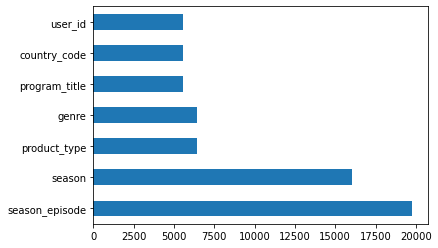

In [15]:
# checking for missing values

missing_val=df.isnull().sum()
missing_val=missing_val[missing_val>0]
missing_val.sort_values(ascending=False).plot(kind='barh')

In [17]:
# retrieving the missing row
df[df['season_episode'].isnull()]

,dt,time,device_name,house_number,user_id,country_code,program_title,season,season_episode,genre,product_type
26,2018-10-01,10:56:47,pcdash,V44087,PvdxHw_rbn01sS9NFXjNDor06llRlDJZ,no,Lilo & Stitch 2: Stitch Has a Glitch,NaN,NaN,Movies Kids,svod
28,2018-10-01,17:00:26,androiddash,2820000000000000000,Eq0jNWUnYSrjSUbWn_ALPDOOG3bXmDVb,se,The Big Bang Theory,NaN,NaN,Other,svod
36,2018-10-01,17:58:56,ios,5420000000000000000,tB0UKkZSSMODQPBooUxcNjAULdaDnUy9,no,Eliteserien: TromsÌü - Brann,NaN,NaN,Sports,svod
37,2018-10-01,14:53:14,atv,20538388,_NblCo7YXxfbO8hpZ_t2iZgTthNH2D5O,se,NHL Live,2015.0,NaN,Sports,svod
41,2018-10-01,08:28:49,atv,20437134,1F336261697E3059,se,The Fate of the Furious,NaN,NaN,Movies Other,svod
...,...,...,...,...,...,...,...,...,...,...,...
99960,2018-10-01,18:47:25,chromecast,20526618,qh4M_7dEgGW7IIyLGRxPdOiuOF9GLbjn,se,Deadpool 2,NaN,NaN,Movies Other,tvod
99968,2018-10-01,14:32:27,pcdash,20471941,2768180BE51DA3FA,no,Chicken Little,NaN,NaN,Movies Kids,est
99989,2018-10-01,20:42:29,atv,47400000000000000000,lV8KtGfuD3y36t_WlXtCDzZ2RfPj3U3I,se,WEG 2018: Daily Review,NaN,NaN,Sports,svod
99990,2018-10-01,16:19:06,pcdashpr,20526618,ME_qPH58htcBI9JbtINOP_mhEFLo6ruq,se,Deadpool 2,NaN,NaN,Movies Other,tvod


# season_episode and season has missing values in the same row. the row can be dropped as no more information loss

In [20]:
# dropping the missing rows
df.dropna(inplace=True)
df


,dt,time,device_name,house_number,user_id,country_code,program_title,season,season_episode,genre,product_type
0,2018-10-01,09:19:15,pcdash,20431077,CFB707615C2C9132,no,Peppa Pig,2.0,S02E16,Series Kids,svod
1,2018-10-01,08:53:53,pcdash,20431072,CFB707615C2C9132,no,Peppa Pig,2.0,S02E11,Series Kids,svod
2,2018-10-01,20:24:34,pcdash,20209083,BzUtTh1jOyTjDIdW_7TDYSSyb2_VUrIO,dk,South Park,6.0,S06E08,Series Other,svod
3,2018-10-01,11:06:11,chromecast,20526429,STgzPEiXcj3olSd0ZEgeAypdXHb_tcrj,no,Adventure Time,9.0,S09E09,Series Kids,svod
4,2018-10-01,17:13:08,ios,20480461,8E0DF454830A552A,no,Teenage Mutant Ninja Turtles,4.0,S04E03,Series Kids,svod
...,...,...,...,...,...,...,...,...,...,...,...
99994,2018-10-01,14:18:09,samsung2016xdk,20437828,OqQnQepB69hIvvZCgk1qb4EbFXkmrbmx,se,Blaze and the Monster Machines,2.0,S02E19,Series Kids,svod
99995,2018-10-01,17:53:39,pcdash,V23476,9cXptZ6KBZa3GKr8ql1ScIGJJ7gxbkeb,dk,24,2.0,S02E12,Series Other,svod
99997,2018-10-01,19:24:16,chromecast,20519544,ZNUqQO8GO6wcjnO5YY_q1BC36568Cpkz,dk,Robinson Ekspeditionen,20.0,S20E06,Own Production,svod
99998,2018-10-01,11:17:11,ios,20428581,4074475EA0B47F87,se,SpongeBob SquarePants,1.0,S01E07,Series Kids,svod


In [21]:
df.isnull().sum()

dt                0
time              0
device_name       0
house_number      0
user_id           0
country_code      0
program_title     0
season            0
season_episode    0
genre             0
product_type      0
dtype: int64

In [28]:
df.nunique()

dt                    1
time              47724
device_name          28
house_number      12204
user_id           59990
country_code          4
program_title       425
season               28
season_episode      942
genre                 4
product_type          1
dtype: int64

In [29]:
print(df['user_id'].value_counts())

7_SuCZsfIAelvUKndybPWPJoMUydFzms    30
q9EBmiK9_KreRjEgMfdRdq3jlU7eTbnp    24
Q_t269pb8JPGGkXgfehiyiqU46Yduv0N    18
BD37C17D66C33849                    17
DF7D6B9CD1FBE313                    16
                                    ..
BF1F1F3C793A8735                     1
2ED39CBF8C190772                     1
Tsqt9MvFMSwrFJC1Octv1l3jOfsIkcP_     1
DAAA37051AEE8A53                     1
rHIXOwx_QQfx0Coq5GVw4TRNkvusVMyf     1
Name: user_id, Length: 59990, dtype: int64


In [30]:
print(df['dt'].value_counts())

2018-10-01    80227
Name: dt, dtype: int64


In [31]:
print(df['program_title'].value_counts())

Peppa Pig                      3647
Robinson Ekspeditionen         3484
Paradise Hotel Sverige         3346
PAW Patrol                     2873
Family Guy                     2388
                               ... 
Ettor & Nollor                    1
Home Team: Florida Panthers       1
Feherty                           1
En dag i livet                    1
Side Effects                      1
Name: program_title, Length: 425, dtype: int64


In [32]:
print(df['device_name'].value_counts())

ios               16324
pcdash            11215
atv                9673
chromecast         9448
androiddash        7149
ps4xdk             4851
samsung2017xdk     2578
pchls              2190
samsung2016xdk     2161
samsung2015xdk     1849
samsung2014xdk     1743
androidxdk         1639
lg2016xdk          1443
lg2017xdk          1418
samsung2013xdk     1285
xboxonexdk          876
samsung2012xdk      801
lg2015xdk           707
ps3xdk              634
pcdashpr            588
lg2013xdk           573
lg2014xdk           277
samsung2018xdk      198
panasonic2014       174
philips2017xdk      154
lg2012xdk           152
lg2018xdk           119
pc                    8
Name: device_name, dtype: int64


In [33]:
print(df['country_code'].value_counts())

se    29588
dk    28558
no    15079
fi     7002
Name: country_code, dtype: int64


In [34]:
print(df['product_type'].value_counts())

svod    80227
Name: product_type, dtype: int64


ios               16324
pcdash            11215
atv                9673
chromecast         9448
androiddash        7149
ps4xdk             4851
samsung2017xdk     2578
pchls              2190
samsung2016xdk     2161
samsung2015xdk     1849
samsung2014xdk     1743
androidxdk         1639
lg2016xdk          1443
lg2017xdk          1418
samsung2013xdk     1285
xboxonexdk          876
samsung2012xdk      801
lg2015xdk           707
ps3xdk              634
pcdashpr            588
lg2013xdk           573
lg2014xdk           277
samsung2018xdk      198
panasonic2014       174
philips2017xdk      154
lg2012xdk           152
lg2018xdk           119
pc                    8
Name: device_name, dtype: int64
*****************************************************************************************************************************


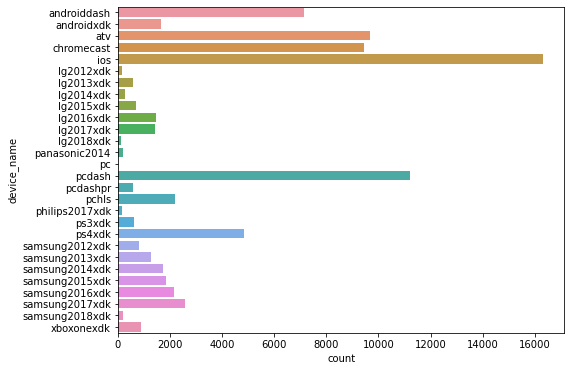

In [37]:
print(df['device_name'].value_counts())
print("*"*125)
plt.figure(figsize=(8,6))
sns.countplot(y=df.device_name.sort_values())

svod    80227
Name: product_type, dtype: int64
*****************************************************************************************************************************


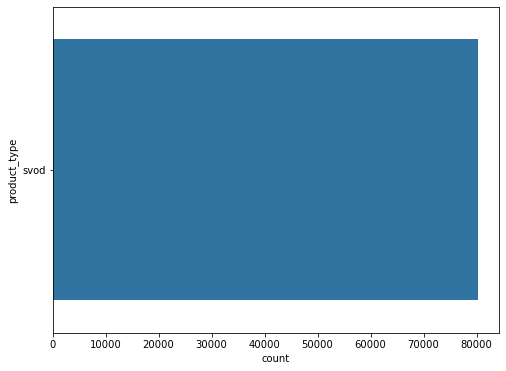

In [40]:
print(df['product_type'].value_counts())
print("*"*125)
plt.figure(figsize=(8,6))
sns.countplot(y=df.product_type.sort_values())

In [45]:

print(df.groupby("user_id")["program_title"].value_counts())

user_id                           program_title                 
634000000000000000000             Blaze and the Monster Machines    3
00023248160A15EE                  South Park                        1
000C0972D15DBC51                  Game Shakers                      1
                                  PAW Patrol                        1
0014Ocg4PtC3DFBoUEiG6dU_oBVLTVpG  Robinson Ekspeditionen            1
                                                                   ..
zzjh5fi718DXCDTb1NrmBZ0yQm8fFK7_  Robinson Ekspeditionen            1
zzmBQj4CjnlmdaBEFoJImrSIKc9iNehp  The Good Doctor                   2
                                  Svenska Hollywoodfruar            1
zzvXB0_9YXzN7NqcCmb3trCossg1nugY  Quantico                          1
zzxtR15adPcakoQKN7ibCpaEp5g1O_yW  Bones                             1
Name: program_title, Length: 64803, dtype: int64


In [42]:

print(df.groupby("user_id")["product_type"].value_counts())

user_id                           product_type
634000000000000000000             svod            3
00023248160A15EE                  svod            1
000C0972D15DBC51                  svod            2
0014Ocg4PtC3DFBoUEiG6dU_oBVLTVpG  svod            1
0017B276ADBE6914                  svod            1
                                                 ..
zzfVgFpEpp2hSrvIVv0AjL5DEhwvIlmN  svod            1
zzjh5fi718DXCDTb1NrmBZ0yQm8fFK7_  svod            1
zzmBQj4CjnlmdaBEFoJImrSIKc9iNehp  svod            3
zzvXB0_9YXzN7NqcCmb3trCossg1nugY  svod            1
zzxtR15adPcakoQKN7ibCpaEp5g1O_yW  svod            1
Name: product_type, Length: 59990, dtype: int64


In [51]:
# Exploring categorical variable

cat_col=[x for x in df.columns if df[x].dtypes=="O"and x not in ['dt', 'time', 'device_name', 'house_number', 'user_id', 'country_code',
       'program_title', 'season', 'season_episode', 'genre', 'product_type']]
print("The categoriacal columns in the dataset",cat_col)
print("_"*125)
df[cat_col].head()

The categoriacal columns in the dataset []
_____________________________________________________________________________________________________________________________


""
0
1
2
3
4


In [50]:
df.columns

Index(['dt', 'time', 'device_name', 'house_number', 'user_id', 'country_code',
       'program_title', 'season', 'season_episode', 'genre', 'product_type'],
      dtype='object')

In [52]:
df.head()

,dt,time,device_name,house_number,user_id,country_code,program_title,season,season_episode,genre,product_type
0,2018-10-01,09:19:15,pcdash,20431077,CFB707615C2C9132,no,Peppa Pig,2.0,S02E16,Series Kids,svod
1,2018-10-01,08:53:53,pcdash,20431072,CFB707615C2C9132,no,Peppa Pig,2.0,S02E11,Series Kids,svod
2,2018-10-01,20:24:34,pcdash,20209083,BzUtTh1jOyTjDIdW_7TDYSSyb2_VUrIO,dk,South Park,6.0,S06E08,Series Other,svod
3,2018-10-01,11:06:11,chromecast,20526429,STgzPEiXcj3olSd0ZEgeAypdXHb_tcrj,no,Adventure Time,9.0,S09E09,Series Kids,svod
4,2018-10-01,17:13:08,ios,20480461,8E0DF454830A552A,no,Teenage Mutant Ninja Turtles,4.0,S04E03,Series Kids,svod


In [58]:
# checking the nunique and value counts for each categorical column
for feature in cat_col:
    print("Value counts in",feature)
    print(df[feature].value_counts())
    print("*"*70)

In [59]:
df['user_id'].unique()

array(['CFB707615C2C9132', 'BzUtTh1jOyTjDIdW_7TDYSSyb2_VUrIO',
       'STgzPEiXcj3olSd0ZEgeAypdXHb_tcrj', ...,
       'bPjz0NeraCu_wZ9kYcng9I34RP1Y8Umk',
       'ddavIpB2mLD_Z_MpzicsoMogk_AnRyoi',
       'ZNUqQO8GO6wcjnO5YY_q1BC36568Cpkz'], dtype=object)

In [60]:
df['device_name'].unique()

array(['pcdash', 'chromecast', 'ios', 'ps4xdk', 'samsung2017xdk',
       'lg2016xdk', 'samsung2013xdk', 'lg2017xdk', 'androiddash',
       'samsung2015xdk', 'androidxdk', 'samsung2014xdk', 'pchls', 'atv',
       'xboxonexdk', 'samsung2016xdk', 'lg2013xdk', 'samsung2012xdk',
       'lg2014xdk', 'ps3xdk', 'lg2015xdk', 'panasonic2014', 'pcdashpr',
       'philips2017xdk', 'lg2018xdk', 'samsung2018xdk', 'lg2012xdk', 'pc'],
      dtype=object)

In [61]:
df['program_title'].unique()

array(['Peppa Pig', 'South Park', 'Adventure Time',
       'Teenage Mutant Ninja Turtles', 'Paradise Hotel Sverige',
       'Seinfeld', 'Quantico', 'NCIS', 'Glee', 'Mad Men',
       'School of Rock', 'MÌ´lklubben', 'Futurama',
       'Robinson Ekspeditionen', 'Family Guy', 'Til Middag Hos',
       'Love Island Norge', 'The Night Shift', 'Swedish Dicks',
       'Hemliga beundrare', 'PAW Patrol', 'Fireman Sam', 'Tree Fu Tom',
       'Okkupert', 'Blaze and the Monster Machines',
       'How I Met Your Mother', 'Dagens mand', 'American Dad',
       'Blindspot', 'TV3 DokumentÌ?r', 'New Amsterdam',
       'Buffy the Vampire Slayer', 'Aber Bergen',
       "It's Always Sunny in Philadelphia", 'NCIS: Los Angeles', 'Bones',
       'The Powerpuff Girls', 'Lego City', 'Haven', 'Dora the Explorer',
       'The Walking Dead', 'Prison Break', 'Bordertown', 'Absentia',
       'Vikings', 'The Brave', 'Henry Danger', 'Frasier', 'Will & Grace',
       'Poketto Monsut€\x81', 'The Blacklist', 'The Clevelan

In [62]:
df['dt'].unique()

array(['2018-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [63]:
df['device_name'].unique()

array(['pcdash', 'chromecast', 'ios', 'ps4xdk', 'samsung2017xdk',
       'lg2016xdk', 'samsung2013xdk', 'lg2017xdk', 'androiddash',
       'samsung2015xdk', 'androidxdk', 'samsung2014xdk', 'pchls', 'atv',
       'xboxonexdk', 'samsung2016xdk', 'lg2013xdk', 'samsung2012xdk',
       'lg2014xdk', 'ps3xdk', 'lg2015xdk', 'panasonic2014', 'pcdashpr',
       'philips2017xdk', 'lg2018xdk', 'samsung2018xdk', 'lg2012xdk', 'pc'],
      dtype=object)

In [64]:
df['country_code'].unique()

array(['no', 'dk', 'se', 'fi'], dtype=object)

In [65]:
df['product_type'].unique()

array(['svod'], dtype=object)

## UNIVARIATE ANALYSIS

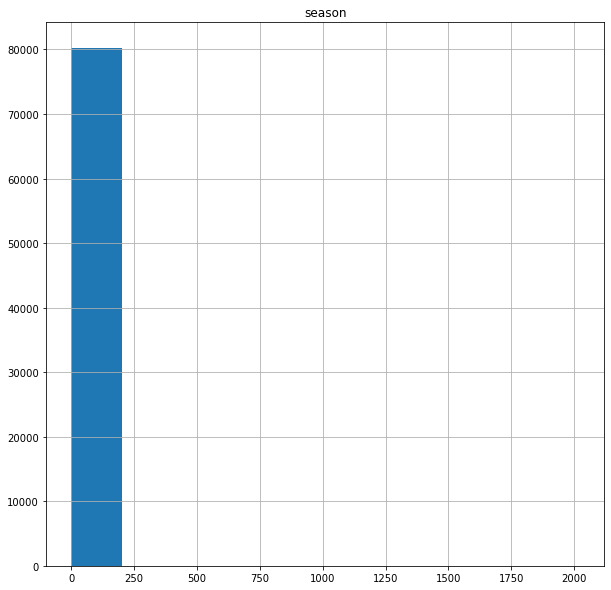

In [68]:
df.hist(figsize=(10,10))
plt.show()

# Distribution Plot of feature

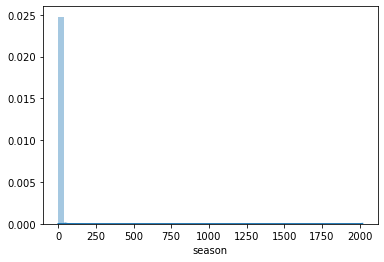

In [69]:
sns.distplot(df['season'])